In [1]:
# Task 3: Customer Segmentation Using RFM Analysis

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('online_retail_II.xlsx')

In [5]:
# Display the first few rows to understand the structure
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
# concise summary of the dataframe to check types and nulls
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.shape

(525461, 8)

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [9]:
df["Description"].nunique() # what is the number of unique products?

4681

In [10]:
df["Description"].value_counts().head() # how many products are there?

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3549
REGENCY CAKESTAND 3 TIER,2212
STRAWBERRY CERAMIC TRINKET BOX,1843
PACK OF 72 RETRO SPOT CAKE CASES,1466
ASSORTED COLOUR BIRD ORNAMENT,1457


In [11]:
df.groupby("Description").agg({"Quantity":"sum"}).head() # what is the most ordered product?

,Quantity
Description,
21494,-720
22467,-2
22719,2
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690


In [12]:
df["Country"].value_counts().head() #how many orders came from what country?

,count
Country,
United Kingdom,485852
EIRE,9670
Germany,8129
France,5772
Netherlands,2769


In [13]:
df.isnull().sum() #Its asks the question of whether there are any missing observations

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [14]:
# Handle Missing Values
# RFM analysis requires a CustomerID. We will remove rows where CustomerID is missing.
print(f"\nNumber of rows before dropping missing Customer ID: {len(df)}")
df.dropna(subset=['Customer ID'], inplace=True)
print(f"Number of rows after dropping missing Customer ID: {len(df)}")


Number of rows before dropping missing Customer ID: 525461
Number of rows after dropping missing Customer ID: 417534


In [15]:
# Convert Customer ID to integer type
df['Customer ID'] = df['Customer ID'].astype(int)

In [16]:
df.dropna(inplace=True) #erases incomplete observations.

df['Invoice'] = df['Invoice'].astype(str) # Convert 'Invoice' column to string type

df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [17]:
# 3. Ensure Correct Data Types
# Convert 'InvoiceDate' from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Converted 'InvoiceDate' column to datetime format.")

Converted 'InvoiceDate' column to datetime format.


In [18]:
# Create a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['Price']
print("Created 'TotalPrice' column (Quantity * Price).")

print("\nData cleaning and preprocessing complete. Here are the first 5 rows of the cleaned data:")
print(df.head())



Created 'TotalPrice' column (Quantity * Price).

Data cleaning and preprocessing complete. Here are the first 5 rows of the cleaned data:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom        30.0  


In [19]:
print("\nCalculating RFM Metrics")

# To calculate Recency, we need a "snapshot" date. We'll use the day after the last transaction.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Snapshot date for Recency calculation: {snapshot_date.date()}")


Calculating RFM Metrics
Snapshot date for Recency calculation: 2010-12-10


In [20]:
# Group data by each customer and calculate R, F, and M
rfm_df = df.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

In [21]:
# Rename the columns for clarity
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

print("\nRFM metrics calculated for each customer. Here's a sample:")
print(rfm_df.head())


RFM metrics calculated for each customer. Here's a sample:
             Recency  Frequency  Monetary
Customer ID                              
12346            165         11    372.86
12347              3          2   1323.32
12348             74          1    222.16
12349             43          3   2671.14
12351             11          1    300.93


In [22]:
print("\nCreating RFM Scores and Segments")

# We will score each customer from 1 to 5 based on their RFM values.
# For Recency, a lower value is better (more recent), so we invert the labels.
# For Frequency and Monetary, a higher value is better.

r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=r_labels)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=m_labels)

print("\nRFM scores (1-5) assigned for each customer:")
print(rfm_df[['R_Score', 'F_Score', 'M_Score']].head())


Creating RFM Scores and Segments

RFM scores (1-5) assigned for each customer:
            R_Score F_Score M_Score
Customer ID                        
12346             2       5       2
12347             5       2       4
12348             2       1       1
12349             3       3       5
12351             5       1       2


In [23]:
# Combine the scores to create a single RFM_Score string
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

In [24]:
# Define Customer Segments
# We create segments based on R and F scores, which are often the most powerful predictors of behavior.
segment_map = {
    r'[4-5][4-5]': 'Champions',
    r'[4-5][2-3]': 'Loyal Customers',
    r'[3-4][1-2]': 'Potential Loyalists',
    r'51': 'New Customers',
    r'[3-4]1': 'Promising',
    r'[2-3][2-3]': 'Need Attention',
    r'[2-3][4-5]': 'At Risk',
    r'1[3-5]': 'Cant Lose Them',
    r'1[1-2]': 'Hibernating',
    r'21': 'Losing Low-Frequency'
}

In [25]:
# Assign segment to each customer
rfm_df['RF_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)
rfm_df['Segment'] = rfm_df['RF_Score'].replace(segment_map, regex=True)

In [26]:
# Handle any combinations not covered by the map
rfm_df['Segment'].fillna('Other', inplace=True)

/tmp/ipython-input-4292620273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_df['Segment'].fillna('Other', inplace=True)


In [27]:
print("\nFinal RFM table with scores and segments:")
print(rfm_df.head())


Final RFM table with scores and segments:
             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
Customer ID                                                                   
12346            165         11    372.86       2       5       2       252   
12347              3          2   1323.32       5       2       4       524   
12348             74          1    222.16       2       1       1       211   
12349             43          3   2671.14       3       3       5       335   
12351             11          1    300.93       5       1       2       512   

            RF_Score               Segment  
Customer ID                                 
12346             25               At Risk  
12347             52       Loyal Customers  
12348             21  Losing Low-Frequency  
12349             33        Need Attention  
12351             51         New Customers  


In [28]:
# Analyze the average RFM values for each segment
segment_rfm = rfm_df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("\nAverage RFM Values per Segment:")
display(segment_rfm.sort_values(by='Monetary', ascending=False))


Average RFM Values per Segment:


,Segment,Recency,Frequency,Monetary
2,Champions,14.121267,10.453394,5298.494559
0,At Risk,77.284672,5.843066,2366.046044
1,Cant Lose Them,236.537383,3.126168,1315.959112
6,Need Attention,94.863857,2.134522,804.943630
5,Loyal Customers,18.793037,2.017408,729.510986
8,Potential Loyalists,48.139535,1.160465,426.300721
4,Losing Low-Frequency,115.100000,1.000000,419.517211
7,New Customers,8.580000,1.000000,386.199200
3,Hibernating,270.379095,1.079563,378.819601



Visualizing Customer Segments


/tmp/ipython-input-379127032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')


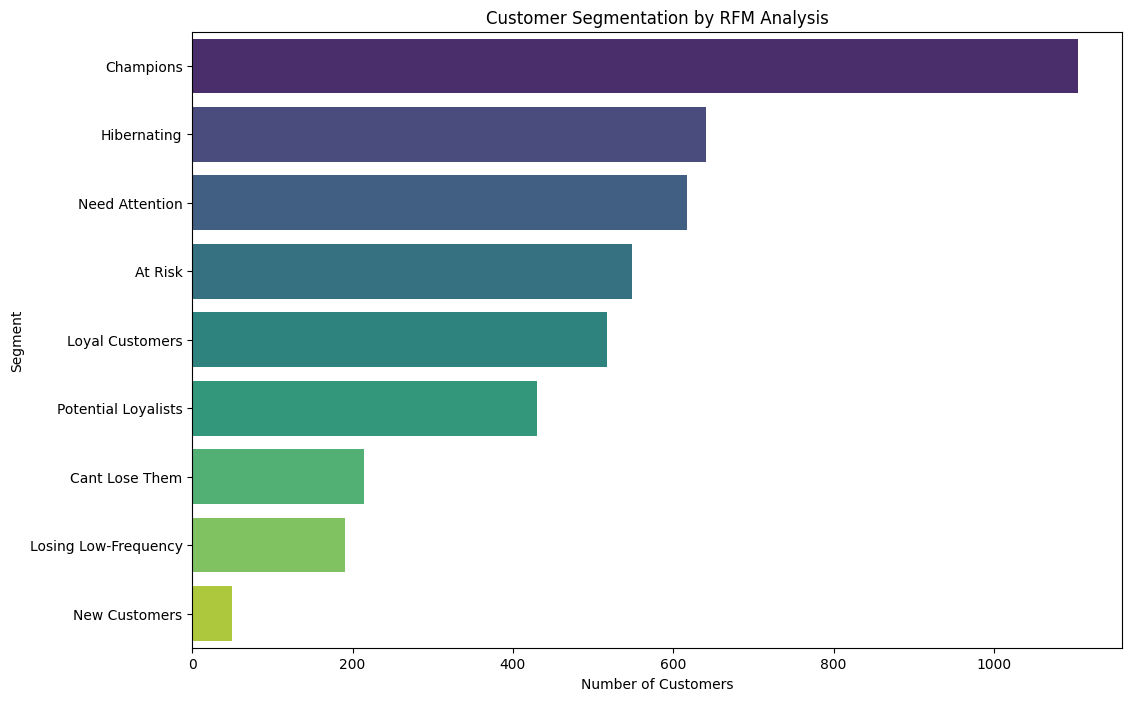


Analysis complete. Customer segments have been identified and visualized.


In [29]:
# Visualize RFM Segments
print("\nVisualizing Customer Segments")

segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')
plt.title('Customer Segmentation by RFM Analysis')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.show()

print("\nAnalysis complete. Customer segments have been identified and visualized.")